In [1]:
learning_rate = 1e-4 # Learning rate (speed): refer to the FIDLE training for explanations if needed. Link to https://gricad-gitlab.univ-grenoble-alpes.fr/talks/fidle/-/wikis/home
batch_size = 8 # Batch size: the number of data (images) contained in a packet sent to the neural network at each iteration (forward + backward + optimization).
num_epochs = 1 # Number of epochs: the count of times the network will traverse the entire dataset during training.

# Fixed parameters
max_days = 182 # Using mandrill images with age ranging from 0 to 182 days 
images_dir = "../data/Images" # path of image dir
dataset_path = "../data/MFD_metadatas.csv" # path of metadatas 

In [2]:
from mandrill.datamodule import MandrillDataModule

# Instance dataModule
dm = MandrillDataModule(images_dir=images_dir, csv_path=dataset_path, max_days=max_days, batch_size=batch_size)


---- MandrillDataModule initialization ----------------------------


In [3]:
import torch
import torch.nn as nn

from lightning import Trainer
from mandrill.models import RegressionHead, VGGFace
from mandrill.module import MandrillModule

torch.manual_seed(0)

# Model
backbone=VGGFace(start_filters=4) # The model scale the number of filters based on this quantity (more == more parameters)
head = RegressionHead(input_dim=backbone.output_dim,
        output_dim=1,
        lin_start=2048,
        n_lin=6,
        sigmoid=False,
        dropout=0.0,
        use_norm=False)



# Loss function
train_loss = nn.MSELoss()
val_loss = nn.L1Loss()

module = MandrillModule(optimizer_class=torch.optim.Adam,
        lr=learning_rate,
        batch_size=batch_size,
        backbone=backbone,
        head=head,
        train_criterion=train_loss,
        val_criterion=val_loss)

# trainer
trainer = Trainer(
    accelerator        = "auto", # Auto select gpu or cpu
    max_epochs         = num_epochs,
)

# run
trainer.fit(module, dm)


---- Mandrill module initialization --------------------------------------------
Hyperarameters are :
lr                       : 0.0001
batch_size               : 8


/home/rkarpins/miniconda3/envs/ia_g5k/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/rkarpins/workspace/ia_sur_g5k/mandrill/dataset.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  da

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/home/rkarpins/miniconda3/envs/ia_g5k/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


/home/rkarpins/miniconda3/envs/ia_g5k/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 402/402 [00:10<00:00, 36.59it/s, v_num=4, loss=0.025, val=52.50]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 402/402 [00:11<00:00, 36.20it/s, v_num=4, loss=0.025, val=52.50]


Predicted Values: 118.71276900172234
Actual Values: 134.36813473701477
Prediction Error:  -15.655365735292435

torch.Size([3, 224, 224])


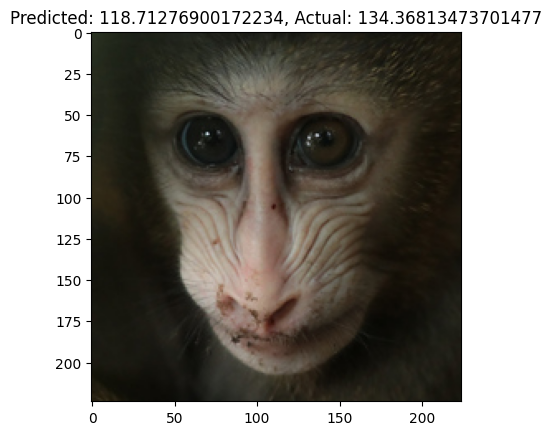

Predicted Values: 103.04725423455238
Actual Values: 100.27473017573357
Prediction Error:  2.772524058818817

torch.Size([3, 224, 224])


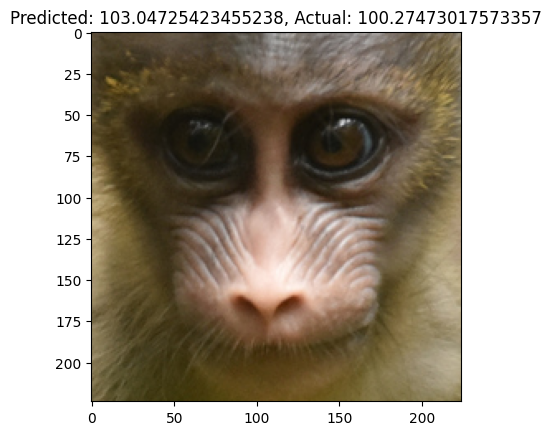

Predicted Values: 80.74883587658405
Actual Values: 4.0109891118481755
Prediction Error:  76.73784676473588

torch.Size([3, 224, 224])


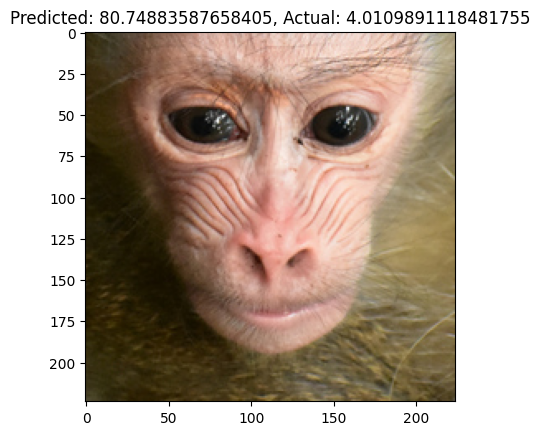

Predicted Values: 41.02367587387562
Actual Values: 2.0054945559240878
Prediction Error:  39.01818131795153

torch.Size([3, 224, 224])


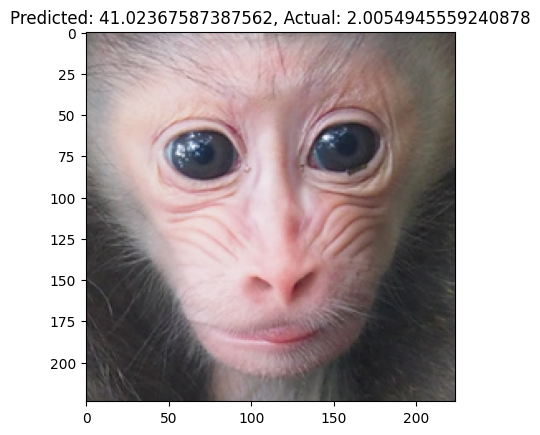

Predicted Values: 49.14737217128277
Actual Values: 2.0054945559240878
Prediction Error:  47.14187761535868

torch.Size([3, 224, 224])


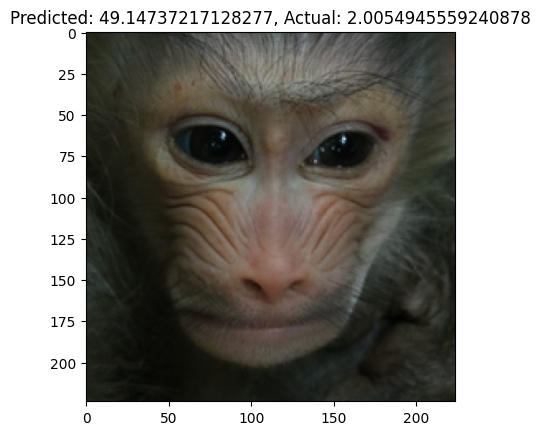

Predicted Values: 115.6165637075901
Actual Values: 124.34066280722618
Prediction Error:  -8.724099099636078

torch.Size([3, 224, 224])


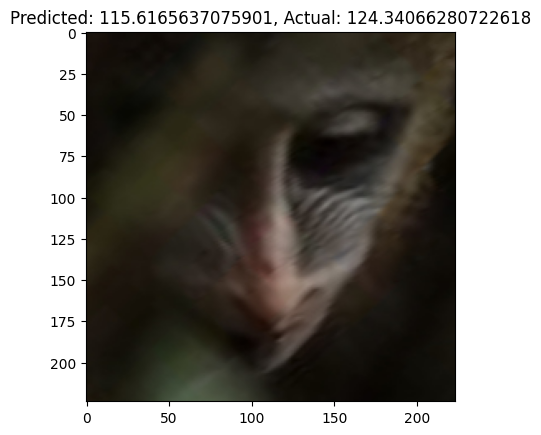

Predicted Values: 44.0212245285511
Actual Values: 96.26374140381813
Prediction Error:  -52.24251687526703

torch.Size([3, 224, 224])


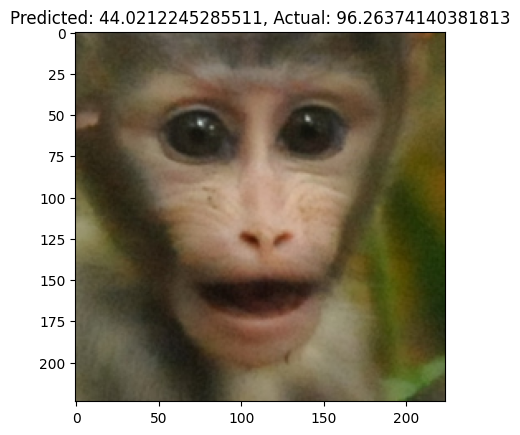

Predicted Values: 75.81776611506939
Actual Values: 166.45604491233826
Prediction Error:  -90.63827879726887

torch.Size([3, 224, 224])


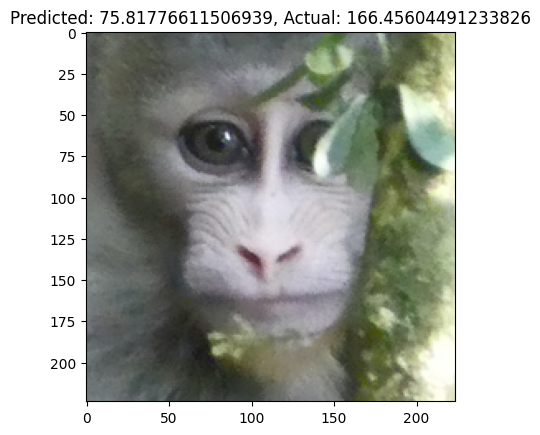

Predicted Values: 173.95759359002113
Actual Values: 284.7802245616913
Prediction Error:  -110.82263097167015

torch.Size([3, 224, 224])


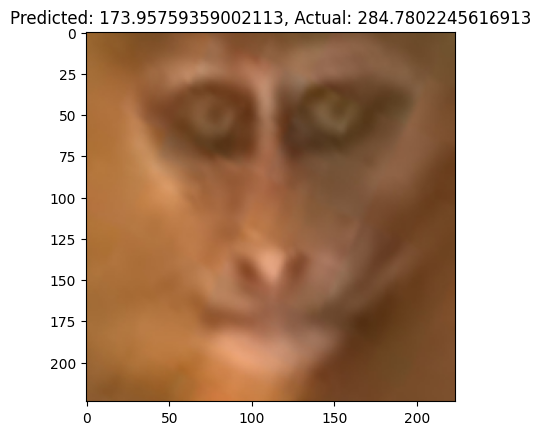

Predicted Values: 46.62911780178547
Actual Values: 8.021978223696351
Prediction Error:  38.60713957808912

torch.Size([3, 224, 224])


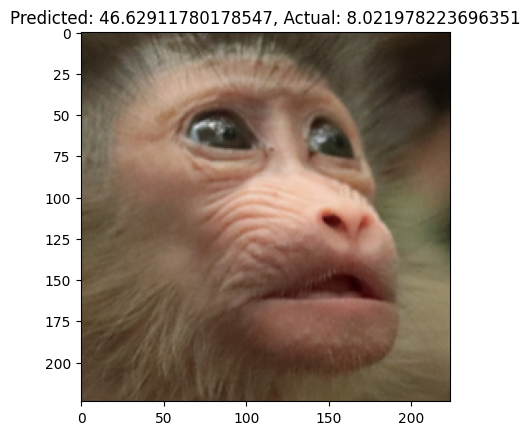

In [4]:
from mandrill.utils.utils import display_validation
display_validation(module.model, dm.val_dataloader())